In [18]:
import pandas as pd
import numpy as np
# Import data and set features

# Set features
target = 'abnormal_Co2_leakage' # Can be any kind of data type
features = ['IsFloodingPeriode','HighWaterLevel','PM25', 'PM10', 'Temperature', 'Humidity', 'Pressure', 'Precipitation','mine_water_level', 'ground_water_level','RhineWaterLevel','Stream_water_level','Discharge'] # Has to be an array

total_dataset = pd.read_csv('/Users/jan-philippviefhues/Desktop/UNI/Maastricht/um/Thesis/gitRepo/masterthesis/cleaned_data/total_dataset_with_precipitation_and_dummies_hourly.csv')

#pd.set_option("display.max_rows", None, "display.max_columns", None)
#print(total_dataset['HighWaterLevel'])


In [13]:
# Oversample the minority class of flood

# To reduce the risk of overfitting, it is only set to 50%

#oversample = RandomOverSampler(sampling_strategy=0.5)
import imblearn
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy=0.5)

X=total_dataset[features] # Has to be an array]  # Features
y=total_dataset[target]

X_over, y_over = oversample.fit_resample(X, y)

print(len(y))
print(len(y_over))


8154
11620


## Calculate ROC Curve

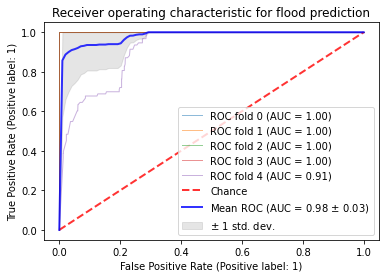

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler

# #############################################################################
# Data generation

# Import data
# Vary between all and 8 features
target = 'IsFloodingPeriode' # Can be any kind of data type
features = ['abnormal_Co2_leakage','CO2','PM25', 'PM10', 'Temperature', 'Humidity', 'Pressure', 'Precipitation','mine_water_level', 'ground_water_level','RhineWaterLevel','Stream_water_level','Discharge'] # Has to be an array
#features = ['ground_water_level','Stream_water_level', 'RhineWaterLevel', 'Humidity','Temperature','Discharge','Pressure'] # Has to be an array

best_parameters = {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}
dataset = pd.read_csv('/Users/jan-philippviefhues/Desktop/UNI/Maastricht/um/Thesis/data/datasets/cleaned_datasets/total_dataset_with_precipitation_and_dummies_hourly.csv')

# Calculate ROC with / and without oversampling. 
# Uncomment the current model. Here Oversampling is 'ON'
oversample = RandomOverSampler(sampling_strategy=0.06)

# Uncomment this for 'none' oversampling model 
#X=dataset[features] # Has to be an array]  # Features
#y=dataset[target]  # Labels

X, y = oversample.fit_resample(X_b, y_b)

X=X.to_numpy()
# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5)
classifier = RandomForestClassifier(n_estimators=best_parameters['n_estimators'],min_samples_split=best_parameters['min_samples_split'],
                               min_samples_leaf=best_parameters['min_samples_leaf'], max_features=best_parameters['max_features'], 
                               max_depth=best_parameters['max_depth'],bootstrap= best_parameters['bootstrap'])

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        name="ROC fold {}".format(i),
        alpha=0.5,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic for flood prediction",
)
ax.legend(loc="lower right")
plt.show()

## Calculate the number of flood records

### Additional calculation to compare the positives and negatives (flood events) of the oversampled dataset to the not oversampled one

In [221]:
dataset = pd.read_csv('/Users/jan-philippviefhues/Desktop/UNI/Maastricht/um/Thesis/data/datasets/cleaned_datasets/total_dataset_with_precipitation_and_dummies_hourly.csv')


count_positives = sum(map(lambda x : x == 1, dataset['IsFloodingPeriode']))
print(count_positives)
count_negatives = sum(map(lambda x : x == 0, dataset['IsFloodingPeriode']))
print(count_negatives)

407
7747


In [234]:
from imblearn.over_sampling import RandomOverSampler
dataset = pd.read_csv('/Users/jan-philippviefhues/Desktop/UNI/Maastricht/um/Thesis/data/datasets/cleaned_datasets/total_dataset_with_precipitation_and_dummies_hourly.csv')
oversample = RandomOverSampler(sampling_strategy=0.06)
features = ['abnormal_Co2_leakage','CO2','PM25', 'PM10', 'Temperature', 'Humidity', 'Pressure', 'Precipitation','mine_water_level', 'ground_water_level','RhineWaterLevel','Stream_water_level','Discharge'] # Has to be an array
y=dataset['IsFloodingPeriode'] # Has to be an array]  # Features
X=dataset[features]

X,y= oversample.fit_resample(X,y)


count_positives = sum(map(lambda x : x == 1, y))
print(count_positives)
count_negatives = sum(map(lambda x : x == 0, y))
print(count_negatives)

464
7747
